In [1]:
# [Nur Colab] Diese Zellen müssen nur auf *Google Colab* ausgeführt werden und installieren Packete und Daten
!wget -q https://raw.githubusercontent.com/KI-Campus/AMALEA/master/requirements.txt && pip install --quiet -r requirements.txt
!wget --quiet "https://github.com/KI-Campus/AMALEA/releases/download/data/data.zip" && unzip -q data.zip

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# Schöne Nachbarschaft

## Importe

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

## K-Nächste Nachbarn (KNN) (engl. K-Nearest-Neighbors)

### Was sind KNN ?

Lassen Sie uns zunächst ein paar Definitionen und Notationen festhalten. Im Folgenden werden wir $x$ zur Bezeichnung eines *Features* (auch Prädiktor, Attribut) und $y$ zur Bezeichnung des *Targets* (auch Label, Klasse) verwenden, welches wir vorhersagen wollen.

KNN gehört zur Familie der Algorithmen für **überwachtes Lernen**. Informell bedeutet dies, dass wir einen gelabelten Datensatz erhalten, der aus Trainingsbeobachtungen $(x,y)$ besteht, und wir möchten die Beziehung zwischen $x$ und $y$ erfassen. Formaler ausgedrückt: Unser Ziel ist es, eine Funktion $h:X→Y$ zu lernen, so dass bei einer Beobachtung $x, h(x)$ die entsprechende Ausgabe $y$ sicher vorhersagen kann.

### Einführung

In der Klassifizierungsumgebung des K-Nächsten-Nachbarn-Algorithmus wird eine Mehrheitsabstimmung zwischen den K-ähnlichsten Instanzen zu einer gegebenen "ungesehenen" Beobachtung gebildet. Die Ähnlichkeit lässt sich anhand einer Abstandsmetrik zwischen zwei Datenpunkten definieren. Die als $x = <a_1(x),a_2(x),...,a_n(x)>$ gegebenen Instanzen werden als Punkte im n-dimensionalen Raum $\mathbb{R}^n$ dargestellt. Ihre Beziehungen/Distanzen können folgendermaßen formuliert werden:

\begin{equation}
d(x_i,x_j) \equiv \sqrt{\sum_{r=0}^{n-1} (a_r(x_i) - a_r(x_j))^2}
\end{equation}

In diesem Fall wird als Abstandsmetrik der euklidische Abstand gewählt, welcher eine gängige Wahl ist. Andere Abstandsmetriken können für eine bestimmte Umgebung besser geeignet sein, z. B. der Manhatten-, Tschebyscheff- und Hamming-Abstand.

Eine Funktion $h$ wird dann aus $\mathbb{R}^n$ $\rightarrow$ $V$ gelernt, wobei $V$ eine endliche Menge aller möglichen Klassen darstellt.

#### Algorithmus

Jede gegebene Instanz $x_i$ wird zur Liste der Trainingsbeispiele hinzugefügt.  

**Schlussfolgerung:**

Eine neue Instanz $x_q$ muss klassifiziert werden und $x_1,...,x_k$ sind die $k$ nächstgelegenen Instanzen zu $x_q$ (diese sind nach Berechnung aller Abstände zwischen Trainingsbeispielen und der neuen Instanz bekannt). Beachten Sie, dass $K$ normalerweise ungerade ist, um Gleichstandssituationen zu vermeiden.
Folglich ergibt sich die neue Klassifikation von $x_q$ durch:

\begin{equation}
h(x_q) \leftarrow arg\max_{v \in V}\sum_{i=1}^{k}\delta (v,y_i)
\end{equation}

mit
\begin{equation}
\delta (a,b) = \begin{cases}
1, \text{if } a=b \\
0, else
\end{cases}
\end{equation}

#### Beispiel:

Klassifikation mit $K=5$:

<img src="https://github.com/KI-Campus/AMALEA/blob/master/Woche%203/images/knn_5.png?raw=1" width="800">

__$\rightarrow$Die neue Instanz wird als Quadrat klassifiziert.__

Klassifikation mit $K=1$:
<img src="https://github.com/KI-Campus/AMALEA/blob/master/Woche%203/images/knn_1.png?raw=1" width="800">

__$\rightarrow$Die neue Instanz wird als Dreieck klassifiziert.__




Wenn $k = 1$ ist, sind die Entscheidungsgrenzen letztendlich die gleichen wie in einem [Voronoi](https://en.wikipedia.org/wiki/Voronoi_diagram) Diagramm.  Während bei Kreisen der Blickpunkt darin besteht, die nächsten K nächstgelegenen Punkte zur neuen Instanz zu finden, zeigt ein Voronoi-Diagramm Regionen, in denen neue Instanzen den bekannten Datenpunkten zugeordnet werden. (Der Blickpunkt liegt nun auf den Quadraten und Dreiecken, die ihrer Klasse neue Punkte neben sich zuordnen).

**Zusätzliche Information:**

- Im Allgemeinen ist es oft sinnvoll, die Input Vektoren zu normalisieren, damit die Dimensionen des Inputs nicht so stark verzerrt werden.

- Es besteht die Möglichkeit, abstandsbasierte Gewichte für Instanzen zu verwenden, anstatt einheitlich bekannte Instanzen zu berücksichtigen. Daher ändert sich die oben angegebene Gleichung in:

    \begin{equation}
    f(x_q) \leftarrow arg\max_{v \in V}\sum_{i=1}^{k} w_i \delta (v,c(x_i))
    \end{equation}

    und die Gewichte sind gegeben durch:

    \begin{equation}
     w_i \equiv \frac{1}{d(x_q,x_i)^2}
    \end{equation}
    
- __Cover und Hart 1967__: Mit $n \rightarrow \infty$, ist der 1-NN-Fehler nicht mehr als doppelt so groß wie der Fehler des Bayes Optimal Klassifikators.(Analog für k>1.) [Quelle](http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html)

- __Fluch der Dimensionalität__: Der induktive Bias des K-NN-Algorithmus besteht darin, dass ähnliche Punkte Labels teilen. In hochdimensionalen Räumen trifft diese Annahme nicht mehr so gut wie in niederdimensionalen Räumen. Dies liegt daran, dass Punkte nicht nahe beieinander liegen, wenn sie in jeder Dimension gleichmäßig liegen. Siehe auch: [Quelle](http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html)

- Reduzieren Sie hochdimensionale Daten durch PCA oder SVD. Anschließend sollten die intrinsischen Dimensionen der Daten niedriger dimensioniert sein oder diese nutzen nicht alle Dimensionen, in denen die Daten vorliegen

- K-NN-Algorithmus wird langsam, wenn n oder die Dimensionen d zunehmen. Dies könnte zu einer nicht durchführbaren Inferenzzeit führen

- K-NN-Algorithmus wird mit zunehmendem n immer genauer

<div class="alert alert-block alert-success">
<b>Aufgabe 3.3.1:</b> Laden Sie die vorbereiteten Training- und Testdatensätze, da wir nur GridSearchCV verwenden werden

</div>

In [63]:
# Load the prepared datasets training and test set, because we are only going to use GridSearchCV

# STUDENT CODE HERE
train = "data/train_prepared.csv"
test = "data/test_prepared.csv"

train_df = pd.read_csv(train)
test_df = pd.read_csv(test)

# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Aufgabe 3.3.2:</b> Normalisieren Sie die Daten mit MinMaxScaling. Bitte verwenden Sie die Formel und achten Sie darauf, dass der Datentyp aufgrund der Visualisierung später in diesem Notebook noch ein pandas Dataframe ist__(Benutzen Sie nicht den MinMaxScaler!)__. Achten Sie ebenso auf identische Variablenbezeichnungen und mehrfache Zellenausführung.
</div>

In [64]:
# Normalize the data

# STUDENT CODE HERE
train_df_scaled = train_df.copy()
test_df_scaled = test_df.copy()
# Min-Max-Skalierung mit Formel auf den gesamten DataFrame anwenden
train_df_scaled = (train_df - train_df.min()) / (train_df.max() - train_df.min())
test_df_scaled = (test_df - test_df.min()) / (test_df.max() - test_df.min())
x_train = train_df_scaled.drop('Survived', axis=1)
y_train = train_df_scaled['Survived']
x_test = test_df_scaled.drop('Survived', axis=1)
y_test = test_df_scaled['Survived']
# STUDENT CODE until HERE

In [65]:
# Imports the necessary modules

from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from matplotlib.colors import ListedColormap
num_neighbors = 1
radius = 100

Die k-Nachbarn-Klassifikation in KNeighborsClassifier ist die am häufigsten verwendete Technik. Die optimale Wahl des Wertes ist stark datenabhängig: Im Allgemeinen unterdrückt ein größeres k die Auswirkungen von Rauschen, reduziert allerdings die Deutlichkeit der Klassifizierungsgrenzen.

In Fällen, in denen die Daten nicht gleichmäßig verteilt sind, kann die radiusbasierte Nachbarschaftsklassifizierung in RadiusNeighborsClassifier eine bessere Wahl sein. Hier gibt der/die NutzerIn einen festen Radius vor, so dass Punkte in spärlicheren Nachbarschaften eine geringere Anzahl an nächsten Nachbarn für die Klassifizierung verwenden. Für hochdimensionale Parameterräume wird diese Methode aufgrund des sogenannten "Fluch der Dimensionalität" weniger effektiv.

Die grundlegende Klassifikation der nächsten Nachbarn verwendet einheitliche Gewichtungen: Das heißt, der einem Abfragepunkt zugewiesene Wert wird aus einer einfachen Mehrheitsentscheidung der nächsten Nachbarn berechnet. Unter Umständen ist es besser, die Nachbarn so zu gewichten, dass nähere Nachbarn mehr zur Anpassung beitragen. Dies kann durch das Schlüsselwort weights erreicht werden. Der Standardwert weights = 'uniform' weist jedem Nachbarn einheitliche Gewichte zu. weights = 'distance' weist Gewichtungen proportional zum Kehrwert der Entfernung vom Abfragepunkt zu. Alternativ kann eine benutzerdefinierte Funktion des Abstands geliefert werden, um die Gewichte zu berechnen." [Quelle](https://scikit-learn.org/stable/modules/neighbors.html)

In [66]:
neigh = KNeighborsClassifier(n_neighbors=num_neighbors)
neigh.fit(x_train, y_train)

neigh_r = RadiusNeighborsClassifier(radius)
neigh_r.fit(x_train, y_train)

print("Test score of K-Nearest Neighbor: %f" %neigh.score(x_test, y_test))
print("Test score of K-Nearest Neighbor with radius: %f" %neigh_r.score(x_test, y_test))

Test score of K-Nearest Neighbor: 0.779904
Test score of K-Nearest Neighbor with radius: 0.636364


### Optimierung

In [67]:
from sklearn.model_selection import GridSearchCV

#### Optimale Anzahl an Nachbarn für den konventionellen Klassifikator (KNN) (engl. Conventional Classifier)

<div class="alert alert-block alert-success">
<b>Aufgabe 3.3.3:</b>
<ul>
<li> Optimieren Sie nicht nur in Bezug auf einen, sondern auf zwei Parameter
<li> Optimieren Sie k in nearest_n_arr sowie die Gewichtsverteilung.
<li> Nutzen Sie GridSearchCV und einen Dictionary für k_params (in der KNN-Aufgabe müssen Sie nicht StratifiedKfold verwenden, sondern nur den Parameter cv, der eine stratifizierte Faltung durchführt, aber ohne den Parameter random_state.)

</ul>
</div>

In [68]:
from dataclasses import KW_ONLY
# Nearest Neighbors values to optimize the model
nearest_n_arr = range(1,20)  # natural numbers

# Necessary for plotting
length_a = len(nearest_n_arr)

# STUDENT CODE HERE
k_params = {
    'n_neighbors': nearest_n_arr,
    'weights': ['uniform', 'distance']
}
grid_search = GridSearchCV(KNeighborsClassifier(), k_params, cv=5)
grid_search.fit(x_train, y_train)
k_model = grid_search

# 5. Beste Parameter und Score
print("Beste Parameterkombination:", grid_search.best_params_)
print("Bester CV-Score:", grid_search.best_score_)
# STUDENT CODE until HERE

Beste Parameterkombination: {'n_neighbors': 6, 'weights': 'uniform'}
Bester CV-Score: 0.8002448057246878


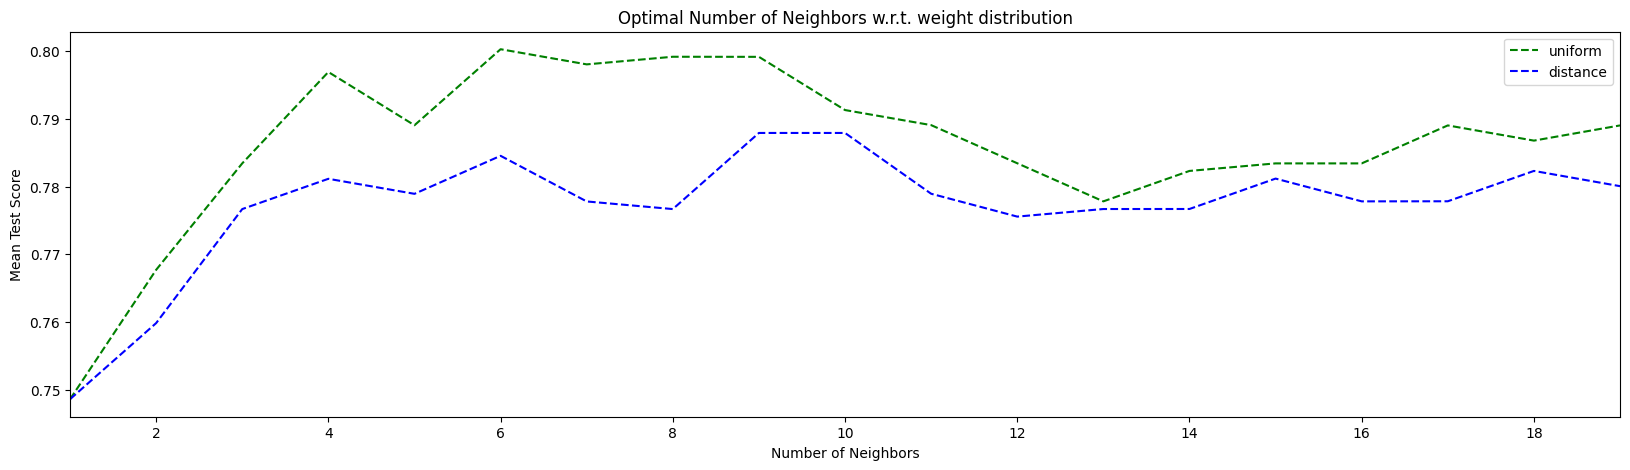

In [69]:
neighourhood = k_params['n_neighbors']
scores = k_model.cv_results_['mean_test_score']
scores_std = k_model.cv_results_['std_test_score']

# Resorting for plots
scores = np.append(scores[0::2], scores[1::2])
scores_std = np.append(scores_std[0::2], scores_std[1::2])

neighourhood = k_params['n_neighbors']

plt.figure().set_size_inches(20, 5)
plt.xlabel('Number of Neighbors')
plt.xlim(neighourhood[0],neighourhood[-1])
plt.ylabel('Mean Test Score')
plt.plot(neighourhood, scores[:length_a],'g--',
        label='uniform')
plt.plot(neighourhood, scores[length_a:]
         , 'b--',label='distance')
plt.title('Optimal Number of Neighbors w.r.t. weight distribution')
plt.legend()

#### Das beste Modell erhalten

<div class="alert alert-block alert-success">
<b>Aufgabe 3.3.4:</b>
<ul>
<li> Ermitteln Sie die besten Parameter und die zugehörigen Ergebnisse.
<li> Geben Sie diese aus!
</ul>
</div>

In [70]:
# Get the params, and the test score of the best model, print the values

# STUDENT CODE HERE
print("Beste Parameterkombination:", grid_search.best_params_)
print("Bester CV-Score:", grid_search.best_score_)
# STUDENT CODE until HERE

Beste Parameterkombination: {'n_neighbors': 6, 'weights': 'uniform'}
Bester CV-Score: 0.8002448057246878


#### Optimaler Radius für den Radius Klassifikator (engl. RadiusClassifier)

<div class="alert alert-block alert-success">
<b>Aufgabe 3.3.5:</b>
<ul>
<li> Analog wie zuvor: Benennen Sie Ihren GridSearchCV k_r_model und verwenden Sie k_r_params (Sehen Sie sich den nächsten Code-Block an, um Konsistenz zu gewährleisten)
<li> Optimieren Sie nun den Dictionary mit Radius und Gewichten
<li> Sie können nun entscheiden, ob Sie Dezimalschritte oder natürliche Zahlen für die Radien wünschen.
</ul>
</div>

In [71]:
# Choose for different radii
radius_arr = np.arange(0.6, 1.2, 0.1)  # decimal steps
radius_arr = range(1,10)  # natural numbers

# Necessary for plotting
length_r_a = len(radius_arr)


# STUDENT CODE HERE
k_r_params = {
    'radius': radius_arr,
    'weights': ['uniform', 'distance']
}
k_r_model = GridSearchCV(RadiusNeighborsClassifier(), k_r_params, cv=5)
k_r_model.fit(x_train, y_train)
# STUDENT CODE until HERE

GridSearchCV(cv=5, estimator=RadiusNeighborsClassifier(),
             param_grid={'radius': range(1, 10),
                         'weights': ['uniform', 'distance']})

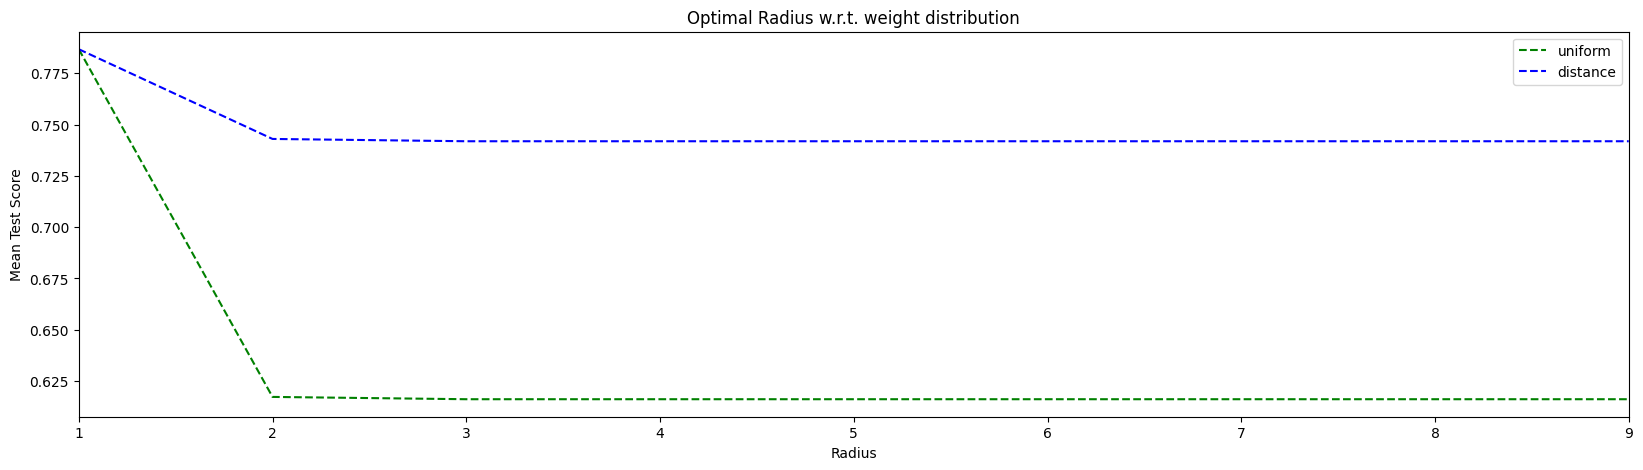

In [72]:
neighourhood_r = k_r_params['radius']
scores_r = k_r_model.cv_results_['mean_test_score']
scores_std_r = k_r_model.cv_results_['std_test_score']

scores_r = np.append(scores_r[0::2], scores_r[1::2])
scores_std_r = np.append(scores_std_r[0::2], scores_std_r[1::2])

plt.figure().set_size_inches(20, 5)
plt.title('Optimal Radius w.r.t. weight distribution')
plt.xlim(neighourhood_r[0],neighourhood_r[-1])
plt.xlabel('Radius')
plt.ylabel('Mean Test Score')
plt.plot(neighourhood_r, scores_r[:length_r_a],'g--',
        label='uniform')
plt.plot(neighourhood_r, scores_r[length_r_a:],'b--',
        label='distance')
plt.legend()

<div class="alert alert-block alert-success">
<b>Frage 3.3.6:</b> Was passiert, wenn Sie einen Radius von 0 nehmen?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


<div class="alert alert-block alert-success">
<b>Frage 3.3.7
    :</b> Können Sie sich vorstellen, warum die Korrektklassifikationsrate (engl. accuracy) des Modells ab einem bestimmten Radius stagniert?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


<div class="alert alert-block alert-success">
<b>Aufgabe 3.3.8:</b>  Ändern Sie das Radius-Array von nur natürlichen Zahlen auf Dezimalzahlen wie 0.6, 0.7.,... (kommentieren Sie die Zeile mit den natürlichen Zahlen aus). Beachten Sie, dass für einige Radien keine Nachbarn gefunden werden können. Passen Sie daher die untere Grenze an, bis mindestens ein Nachbar gefunden wird.
</li>
</ul>
</div>

<div class="alert alert-block alert-success">
<b>Frage 3.3.9:</b> Warum macht der zweite Ansatz mehr Sinn?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


#### Das beste Modell erhalten

<div class="alert alert-block alert-success">
<b>Aufgabe 3.3.10:</b> Ermitteln Sie für den Radius Klassifikator das beste Modell und dessen entsprechende Parameter. Geben Sie diese mit dem Score aus.
</div>

In [73]:
# Get the params, and the test score of the best model, print the values
# STUDENT CODE HERE
print("Beste Parameterkombination:", k_r_model.best_params_)
print("Bester CV-Score:", k_r_model.best_score_)
# STUDENT CODE until HERE

Beste Parameterkombination: {'radius': 1, 'weights': 'uniform'}
Bester CV-Score: 0.7867365513778168


### Vergleich

<div class="alert alert-block alert-success">
<b>Frage 3.3.11:</b> Welches Modell würden Sie nehmen, Radius Klassifikator (engl.RadiusClassifier) oder konventioneller Klassifikator (engl. Conventional Classifier) und warum? Vergleichen Sie daher die trainierten Klassifikatoren mit der besten Parametereinstellung und die Ergebnisse von GridSearchCV.
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


<div class="alert alert-block alert-success">
<b>Frage 3.3.12:</b> Sind die Gewichte in den zwei besten Modellen einheitlich?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


### Visualisierung

Wir nehmen die beiden Features des Trainingssatzes und schauen, wo die Entscheidungsgrenzen für ein darauf trainiertes KNN gezogen werden.

In [74]:
def plot_knn(n_neighbors:int, radius:float, f_names:list, X:np.array, y:np.ndarray):

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000','#0000FF'])

    h = .02
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = KNeighborsClassifier(n_neighbors, weights=weights)
        clf_r = RadiusNeighborsClassifier(radius=radius, weights= weights, outlier_label=0)
        clf.fit(X, y)
        clf_r.fit(X,y)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z2 = clf_r.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        Z2 = Z2.reshape(xx.shape)

        f,ax = plt.subplots(1,2,figsize=(20,5))

        ax[0].pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
        sc1 = ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                    edgecolor='k', s=20)

        ax[0].set_xlim(xx.min(), xx.max())
        ax[0].set_ylim(yy.min(), yy.max())
        ax[0].set_xlabel(f_names[0])
        ax[0].set_ylabel(f_names[1])
        ax[0].set_title("K-Nearest Neighbor with (k= %i, weights = '%s')"
                       % (n_neighbors, weights))
        f.colorbar(sc1,ax = ax[0])

        ax[1].pcolormesh(xx, yy, Z2, cmap=cmap_light, shading='auto')
        sc2 = ax[1].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                    edgecolor='k', s=20)

        ax[1].set_xlim(xx.min(), xx.max())
        ax[1].set_ylim(yy.min(), yy.max())
        ax[1].set_xlabel(f_names[0])
        ax[1].set_ylabel(f_names[1])
        ax[1].set_title("Radius Neighbors Classifier with (R= %0.3f, weights = '%s')"
                       % (radius, weights))
        f.colorbar(sc1, ax = ax[1])

    plt.show()

In [75]:
# Reconsider all features we have
x_test.columns

Index(['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Name_length', 'Fare_log',
       'Fare_bin'],
      dtype='object')

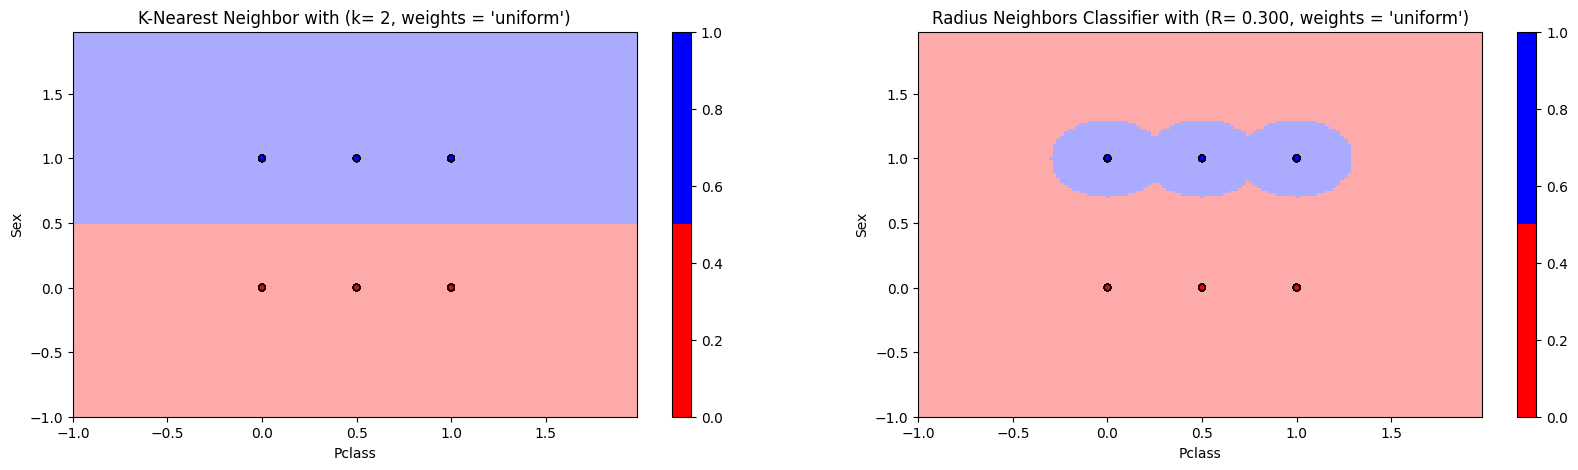

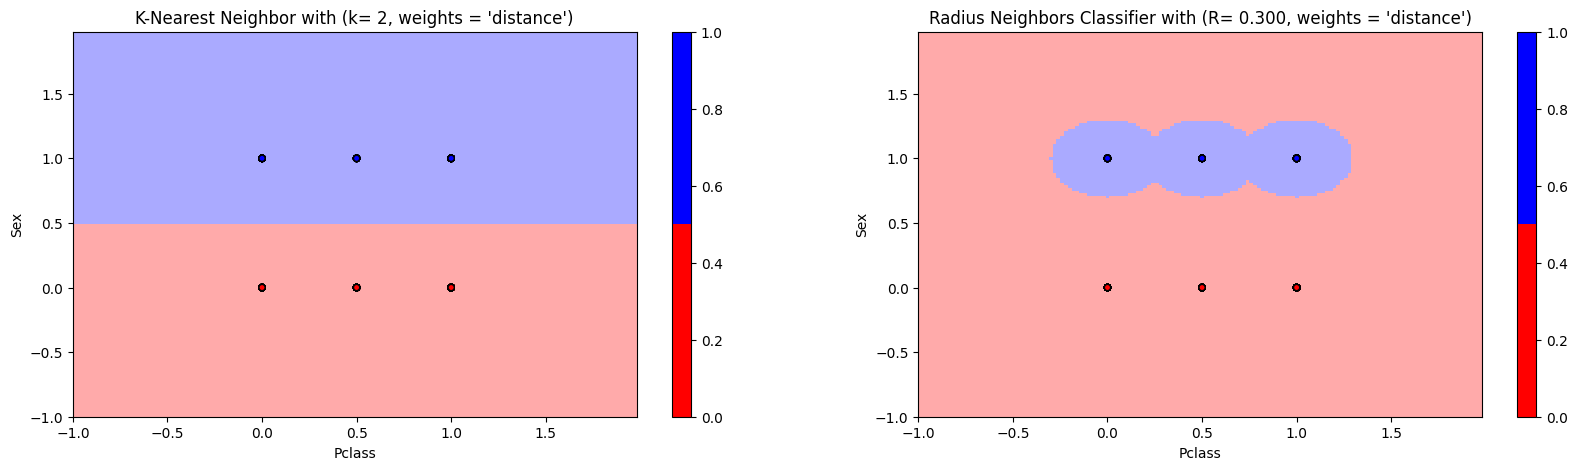

In [76]:
# Choose features to compare
features_compared = ['Pclass', 'Sex']

# Plot them
plot_knn(2, 0.3, features_compared, np.array(x_test[features_compared]), y_test.values)

<div class="alert alert-block alert-success">
<b>Frage 3.3.13:</b> Welche Funktionen wurden in der Visualisierung verglichen?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


<div class="alert alert-block alert-success">
<b>Frage 3.3.14:</b> Warum sind in der Visualisierung nur 6 Punkte vorhanden?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwortr:</b> Da es für jedes Feature nur 3 bzw. 2 Werte gibt, ergeben sich 6 Kombinationen.
</div>

<div class="alert alert-block alert-success">
<b>Frage 3.3.15:</b> Sind die zuvor ermittelten optimalen Werte für KNN und RNN (über GridSearchCV) für diese Plots zuverlässig?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


<div class="alert alert-block alert-success">
<b>Frage 3.3.16:</b>  Was passiert mit den Entscheidungsgrenzen, wenn Sie k erhöhen? Sie könnten die Features ändern, um das zu sehen.
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


<div class="alert alert-block alert-success">
<b>Aufgabe 3.3.17:</b> Plotten Sie stetige Features, wenn möglich.
</div>

<div class="alert alert-block alert-success">
<b>Aufgabe 3.3.18:</b> Lassen Sie die Normalisierung gleich zu Beginn dieser Aufgabe weg.
</div>

<div class="alert alert-block alert-success">
<b>Frage 3.3.19:</b>  Ist es eine gute Idee, nicht zu normalisieren?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


### Visualisierung mit verschiedenen Methoden

Im Folgenden werden einige Möglichkeiten zur Visualisierung von Daten in höheren Dimensionen verwendet, da wir mit den knn_plots bisher nur zwei Dimensionen betrachtet haben.

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import make_blobs

from pandas.plotting import parallel_coordinates

#### Dimensionsreduktion mit PCA

Die Dimensionsreduktion mit PCA kann auch für Preprocessing Zwecke verwendet werden (auch mit K-NNs). Diese wird hier aber nur für Visualisierungszwecke verwendet.

In [78]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(x_train))

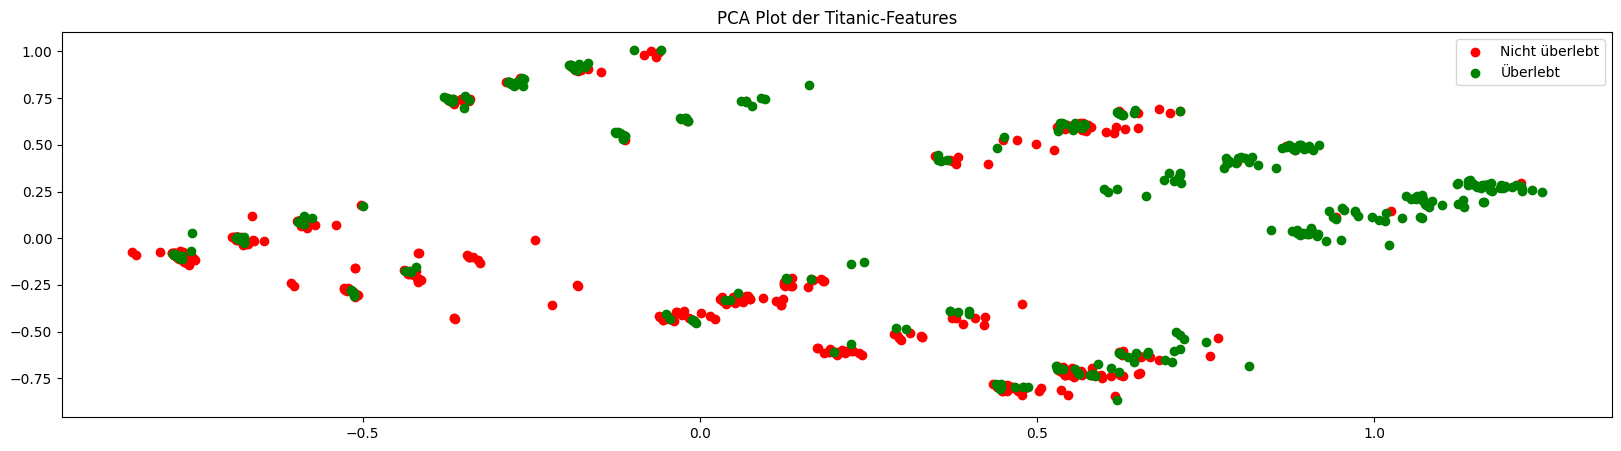

In [79]:
plt.figure(figsize=(20,5))
plt.scatter(transformed[y_train==0][0], transformed[y_train==0][1], label='Nicht überlebt', c='red')
plt.scatter(transformed[y_train==1][0], transformed[y_train==1][1], label='Überlebt', c='green')
plt.title("PCA Plot der Titanic-Features")

plt.legend()
plt.show()

#### Parallele Koordinaten

Eine Zeile beschreibt einen Datenpunkt in Ihren Daten. Wenn Sie sich "stetige" Werte ansehen (mehr als nur eine Handvoll diskreter Werte), können Sie sehen, dass zum Beispiel lange Namen dazu tendieren, zu überleben.

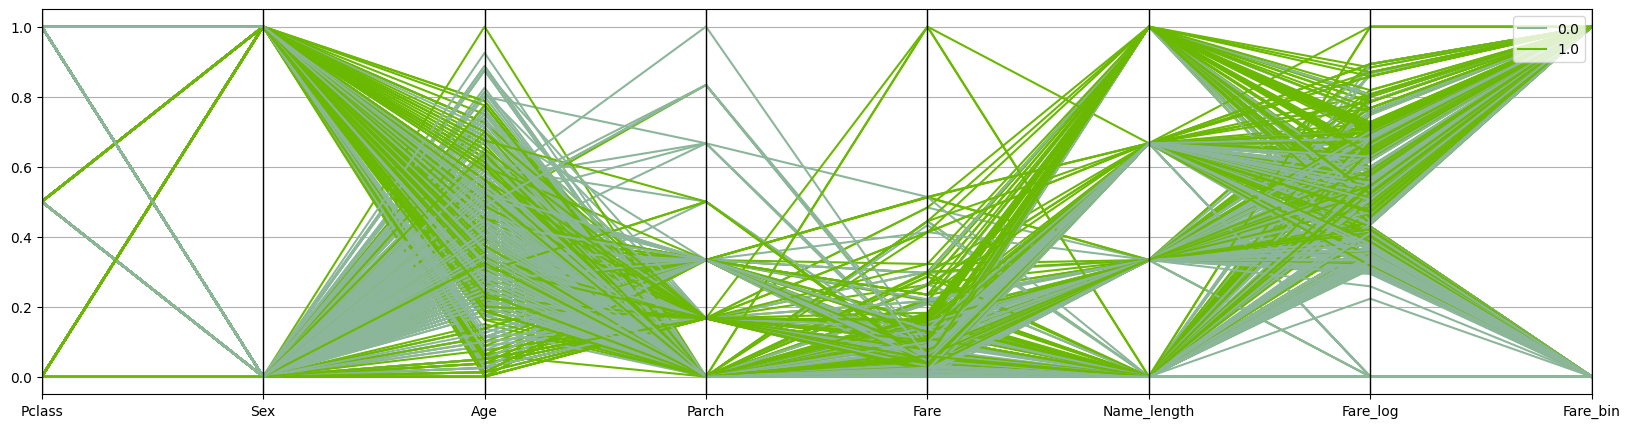

In [80]:
data_norm = pd.concat([x_train, y_train], axis=1)

# Perform parallel coordinate plot
plt.figure(figsize=(20,5))
parallel_coordinates(data_norm, 'Survived')
plt.show()

<div class="alert alert-block alert-success">
<b>Frage 3.3.20:</b>  Was passiert, wenn die Daten bei diesen Methoden nicht normalisiert werden? Prüfen Sie selbst.
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


Siehe auch: http://www.apnorton.com/blog/2016/12/19/Visualizing-Multidimensional-Data-in-Python/

## Weitere Methoden


- Bagging
- Logistic Regression
- Random Forests
- Kombination aus Bagging und GridSearchCV